## 0. 🎯Import libraries

In [15]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme_minimal, ggtitle, themes, element_text, geom_bar, coord_flip

from pprint import pprint


## 1. 🎯

In [2]:
# Load the DataFrame from the file
filtered_df_posts = pd.read_csv('../data/posts.csv')

filtered_df_posts.head()

/var/folders/b0/0cd003554v91pp_l9x5rsxjr0000gn/T/ipykernel_12024/2423861270.py:2: DtypeWarning: Columns (39,103,105,107,108,109,110,111,112,113,116,119,120,122,124,125,127,128,129,130,131,132,133,136,139,140,142,143,144,145,146,149,150,151,152,153,154,157,158,159,160,161,162,165,166,167,168,169,170,171,174,175,176,177,178,179,182,183,184,185,186,187,190,191,192,193,194,195,198,199,200,201,202,203,206,207,208,209,210,211,214,215,216,217,218,219,222,223,224,225,226,227,230,231,232,233,234,235,238,239,240,241,242,243,246,247,248,249,250,251,254,255,256,257,258,259,262,263,264,265,266,267,270,271,272,273,274,275,278,279,280,281,282,283,286,287,288,289,290,291,294,295,296,297,298,299,302,303,304,305,306,307,310,311,312,313,314,315,318,319,320,321,322,323,326,327,328,329,330,331,334,335,336,337,338,339,342,343,344,345,346,347,350,351,352,353,354,355,358,359,360,361,362,363,366,367,368,369,370,371,374,375,376,377,378,379,382,383,384,385,386,387,390,391,392,393,394,395,398,399,400,401,402,403,

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media_metadata.5drdh5pxay051.s.u,media_metadata.5drdh5pxay051.id,media_metadata.d1whnrybrjl31.status,media_metadata.d1whnrybrjl31.e,media_metadata.d1whnrybrjl31.m,media_metadata.d1whnrybrjl31.p,media_metadata.d1whnrybrjl31.s.y,media_metadata.d1whnrybrjl31.s.x,media_metadata.d1whnrybrjl31.s.u,media_metadata.d1whnrybrjl31.id
0,NaN,recipes,NaN,t2_i9192ot8,False,NaN,0,False,Classic Tiramisu Recipe (original Italian pizz...,"[{'e': 'text', 't': 'Recipe'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,recipes,NaN,t2_g90hdupc,False,NaN,0,False,Orange Cookies 🍊🧡,"[{'e': 'text', 't': 'Recipe'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,recipes,NaN,t2_mudt5t8m,False,NaN,0,False,"Stir Fry Supreme – Chives, cashews and Shrimp","[{'e': 'text', 't': 'Recipe'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,recipes,NaN,t2_7xjeg,False,NaN,0,False,Sous Vide Chicken and Potatoes,"[{'e': 'text', 't': 'Recipe'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,recipes,NaN,t2_dl64q0hy,False,NaN,0,False,Chicken Riggies,"[{'e': 'text', 't': 'Recipe'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
selected_columns = ['id', 'title', 'score', 'num_comments', 'created_utc', 'upvote_ratio', 'link_flair_text', 'author', 'url']
filtered_df_posts = filtered_df_posts[selected_columns]
flair_names = ['Recipe', 'Dessert', 'Pasta', 'Poultry', 'Vegetarian', 'Drink', 'Beef', 'Pork', 'Seafood']

In [4]:
filtered_df_posts[filtered_df_posts['link_flair_text'] == "Fruit\\Vegetarian"]

,id,title,score,num_comments,created_utc,upvote_ratio,link_flair_text,author,url
1829,181or4u,Clear-the-fridge Biscuits,42,2,1.700701e+09,0.89,Fruit\Vegetarian,TzuChiCultureMission,https://i.redd.it/5qnpls1xvz1c1.png
1830,17qoiom,Gazpacho Moreliano Mexican Tropical Fruit Salad,124,7,1.699458e+09,0.96,Fruit\Vegetarian,dobbernationloves,https://i.redd.it/2toj6d6na5zb1.jpg
1831,17lh5ss,Kashke Bademjan Persian Eggplant Dip,115,9,1.698859e+09,0.95,Fruit\Vegetarian,dobbernationloves,https://i.redd.it/7es8gk1asrxb1.jpg
1832,17d4ec4,Stuffed tomatoes and peppers. A traditional Gr...,26,8,1.697900e+09,0.90,Fruit\Vegetarian,CookedWithLove,https://i.redd.it/8sb9a53vkkvb1.jpg
1833,175unb3,Coconut Date Squares,52,9,1.697074e+09,0.93,Fruit\Vegetarian,TzuChiCultureMission,https://i.redd.it/asv00ffnbotb1.png
...,...,...,...,...,...,...,...,...,...
2062,cwwkcq,Bhindi,14,3,1.567057e+09,0.72,Fruit\Vegetarian,mark30322,https://i.redd.it/y6698lnkqbj31.jpg
2063,cwwfal,Restaurant Style Phool Gobhi Masala Recipe,18,1,1.567056e+09,0.85,Fruit\Vegetarian,mark30322,https://i.redd.it/ycwjgo0pnbj31.jpg
2064,csv234,Celery and Soy Stuffed Butternut Squash,9,1,1.566290e+09,0.77,Fruit\Vegetarian,mortoray,https://imgur.com/OyakVfz
2065,cs2z3v,Grilled Nectarine Caprese Salad,1726,22,1.566144e+09,0.97,Fruit\Vegetarian,codelycat,https://i.redd.it/tzjwjnulc8h31.jpg


In [5]:
plot = (ggplot(
       filtered_df_posts, aes(x='upvote_ratio')) + 
       geom_histogram(binwidth=0.01, fill='#5c3da4') + 
       themes.theme_matplotlib() + 
       ggtitle("Upvote ratio for all posts") + 
       themes.theme(plot_title = element_text(weight='bold', color="black")) +
        themes.theme(aspect_ratio=9/16))
plot.save(f"../plots/plot_all.jpg", format="jpg")

/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_all.jpg


In [6]:
for flair in flair_names:
    plot = (
        ggplot(filtered_df_posts[filtered_df_posts["link_flair_text"] == flair], aes(x='upvote_ratio')) + 
        geom_histogram(binwidth=0.01, fill='#5c3da4') +
        themes.theme_matplotlib() +
        ggtitle("Upvote ratio for all posts") +
        themes.theme(plot_title = element_text(weight='bold', color="black")) +
        themes.theme(aspect_ratio=9/16)
    )
    plot.save(f"../plots/plot_{flair}.jpg", format="jpg")

/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_Recipe.jpg
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_Dessert.jpg
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_Pasta.jpg
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_Pou

In [7]:
plot = ggplot(
       filtered_df_posts[filtered_df_posts["link_flair_text"] == "Fruit\Vegetarian"], aes(x='upvote_ratio')) + \
       geom_histogram(binwidth=0.01, fill='#5c3da4') + \
       themes.theme_matplotlib() + \
       ggtitle("Upvote ratio for all posts") + \
       themes.theme(plot_title = element_text(weight='bold', color="black"))+ \
       themes.theme(aspect_ratio=9/16)
plot.save(f"../plots/plot_FruitVegetable.jpg", format="jpg")

/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/songyi/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../plots/plot_FruitVegetable.jpg


          id                                              title  score  \
1100  dxi6nw  Concentrated Distillate cocktail (via The Oute...     16   
1034  gsip7o                      The Famous Peanut Haberdasher      2   
1039  gog1fj                             Hot Chocolate question      2   
364   y1bf3i               Raspberry &amp; Pistachio Cheesecake     93   
1053  gd567s       Try the Wobbly Piledriver - Awesome Cocktail      3   
...      ...                                                ...    ...   
1047  ggw575   Time for a good old fashion Oak Dog me thinks :)      0   
1036  gqs8om                               NEVER .. make this!!      0   
1030  h9bihp  Lockdown is OVER .. time for an Electric Denti...      0   
1020  hp67gy                                Sucker-Free Grandma      0   
1041  gnk5cz                        Deep Shot - Cures Any Virus      0   

      num_comments   created_utc  upvote_ratio link_flair_text        author  \
1100             2  1.573966e+0

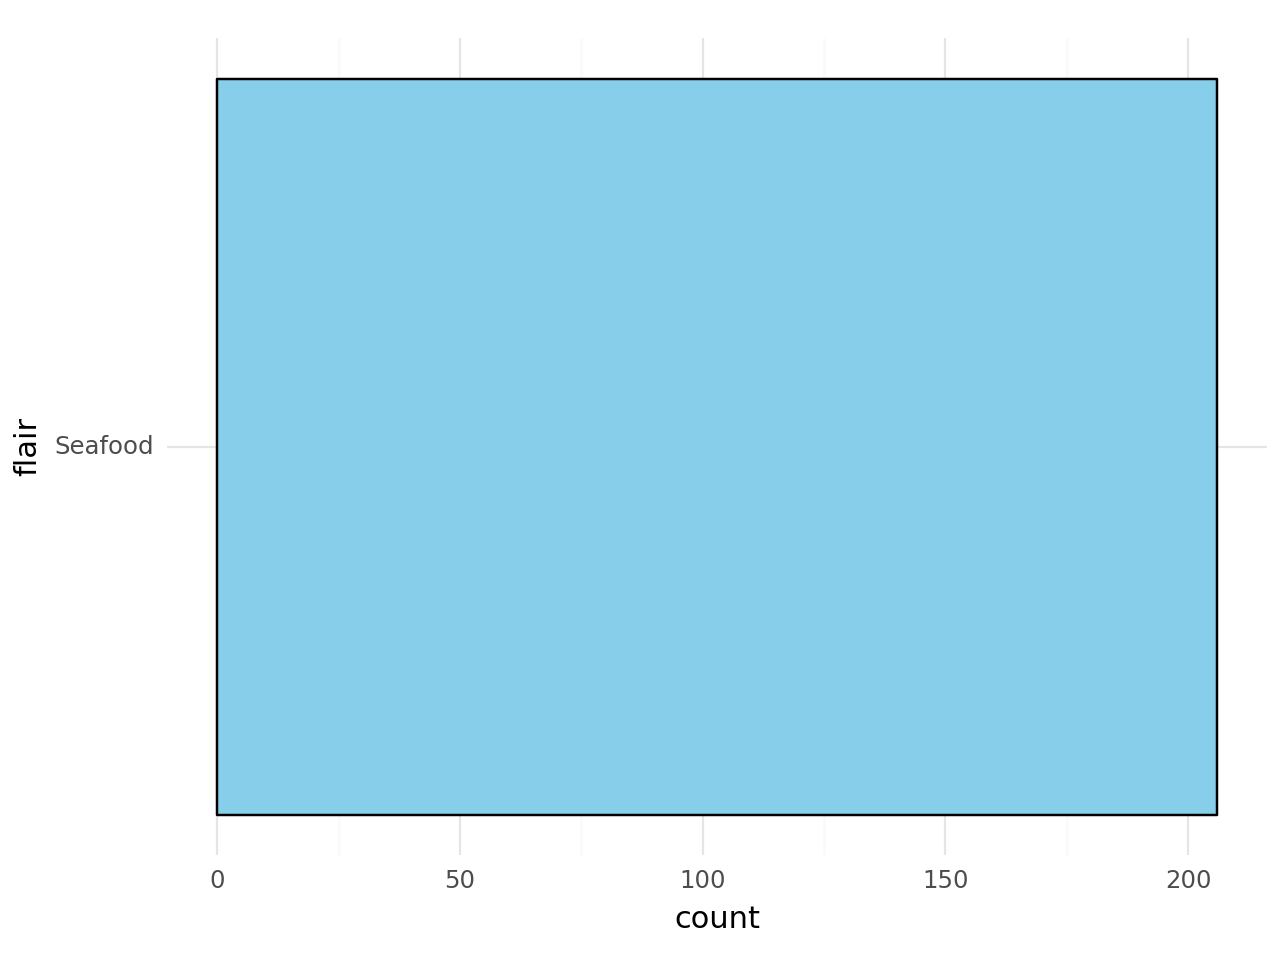

In [17]:
# Sort by 'upvote ratio' in descending order
df_sorted = filtered_df_posts.sort_values(by='upvote_ratio', ascending=False)

# Display the sorted DataFrame
print(df_sorted)

# Calculate the number of rows for the top 10%
top_10_percent = int(0.1 * len(df_sorted))

# Take the top 10% of the DataFrame
top_10_df = df_sorted.head(top_10_percent)

# Plot a bar graph showing the number of posts from different flairs
(ggplot(top_10_df, aes(x='flair'))
 + geom_bar(fill='skyblue', color='black')
 + theme_minimal()
 + coord_flip()
).draw()
